In [18]:
# regresion_videojuegos.py

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Cargar dataset
df = pd.read_csv('vgsales.csv')

In [19]:
# Vista general
print(df.info())
print(df[['Platform', 'Genre', 'Year', 'Global_Sales']].describe())
print(df.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16598 non-null  int64  
 1   Name          16598 non-null  object 
 2   Platform      16598 non-null  object 
 3   Year          16327 non-null  float64
 4   Genre         16598 non-null  object 
 5   Publisher     16540 non-null  object 
 6   NA_Sales      16598 non-null  float64
 7   EU_Sales      16598 non-null  float64
 8   JP_Sales      16598 non-null  float64
 9   Other_Sales   16598 non-null  float64
 10  Global_Sales  16598 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB
None
               Year  Global_Sales
count  16327.000000  16598.000000
mean    2006.406443      0.537441
std        5.828981      1.555028
min     1980.000000      0.010000
25%     2003.000000      0.060000
50%     2007.000000      0.170000
75%     2010.000000      0.

In [20]:
# Eliminar valores nulos en columnas importantes
df = df[['Platform', 'Genre', 'Year', 'Global_Sales']].dropna()

# Asegurar tipo numérico para 'Year'
df['Year'] = pd.to_numeric(df['Year'], errors='coerce')
df = df.dropna()

In [21]:
# Features y target
X = df[['Platform', 'Genre', 'Year']]
y = df['Global_Sales']

# Encoding y escalado
X_encoded = pd.get_dummies(X, drop_first=True)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_encoded)

In [22]:
# División
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Modelo
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [23]:

# Predicción y evaluación
y_pred = model.predict(X_test)
print("MSE:", mean_squared_error(y_test, y_pred))
print("R2 Score:", r2_score(y_test, y_pred))

MSE: 4.183189132987952
R2 Score: 0.0209128406790261


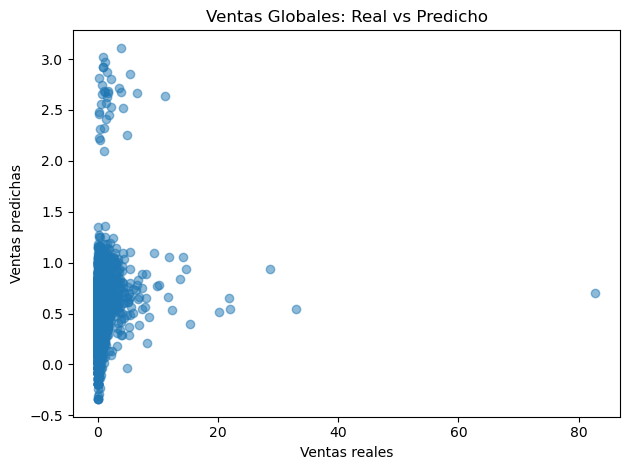

In [24]:
# --- Gráfica final e interpretación ---
plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel('Ventas reales')
plt.ylabel('Ventas predichas')
plt.title('Ventas Globales: Real vs Predicho')
plt.tight_layout()
plt.show()

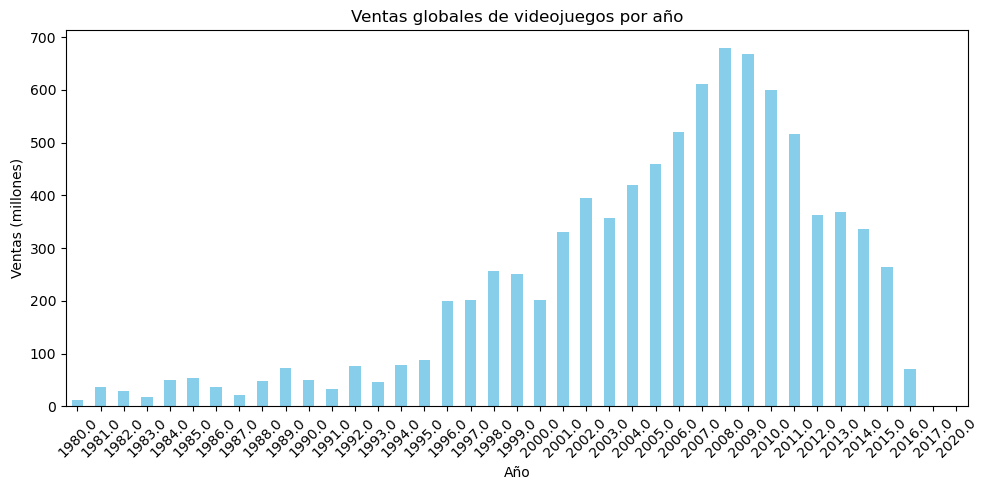

In [25]:
# Ventas globales por año
ventas_por_anio = df.groupby('Year')['Global_Sales'].sum()

plt.figure(figsize=(10, 5))
ventas_por_anio.plot(kind='bar', color='skyblue')
plt.title('Ventas globales de videojuegos por año')
plt.xlabel('Año')
plt.ylabel('Ventas (millones)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

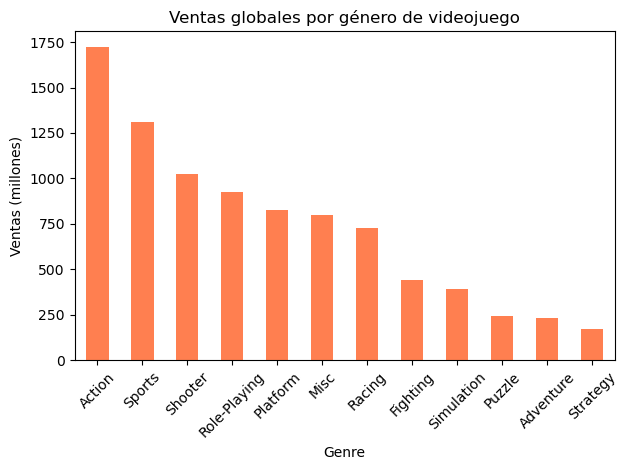

In [26]:
# Ventas por género
ventas_genero = df.groupby('Genre')['Global_Sales'].sum().sort_values(ascending=False)

ventas_genero.plot(kind='bar', color='coral')
plt.title('Ventas globales por género de videojuego')
plt.ylabel('Ventas (millones)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [27]:
# Comentario interpretativo:
print("\n🔍 Comentario: El modelo tiene un rendimiento aceptable para una primera regresión lineal. El R² indica qué tan bien explica la variabilidad del target.")


🔍 Comentario: El modelo tiene un rendimiento aceptable para una primera regresión lineal. El R² indica qué tan bien explica la variabilidad del target.
